## Models
The following multiple linear regression model will be entertained:

\begin{align}
Y =1+2X_{1} +3X_{2} +\epsilon,
\end{align}

where $\epsilon$ has a $N(0,1)$ distribution.


### Data Generation
Generate 3 datasets with correlations $\rho$ 0.50, 0.90 and 0.99, respectively.

In [297]:
generate_data <- function(rhos, n_samples, normal = F, l1, l2) {
    len = length(rhos)
    x1 = x2 = z1 = z2 = y = matrix(rep(NA, n_samples*len), ncol=len)
    
    for (i in 1:len) {
        if (normal) {
            x1[, i] = z1[, i] = rnorm(n_samples)
            z2[, i] = rnorm(n_samples)
        } else {
            x1[, i] = z1[, i] = runif(n_samples, l1, -l1)
            z2[, i] = runif(n_samples, l2, -l2)
        }

        x2[, i] = rhos[i]*z1[, i] + (1-rhos[i])*z2[, i]
        epsilon = rnorm(n_samples)
        y[, i] = 1 + 2*x1[, i] + 3*x2[, i] + epsilon
    }
    
    return(list(y=y, x1=x1, x2=x2, z1=z1, z2=z2))
}

rhos = c(.1, .5, .9, .99)
dat = generate_data(rhos = rhos, n_samples = 100, normal = T, l1=-10, l2=-5)
y = unname(dat$y)
x1 = unname(dat$x1)
x2 = unname(dat$x2)
z1 = unname(dat$z1)
z2 = unname(dat$z2)

## Plots of $X_{1i}$ vs. $X_{2i}$

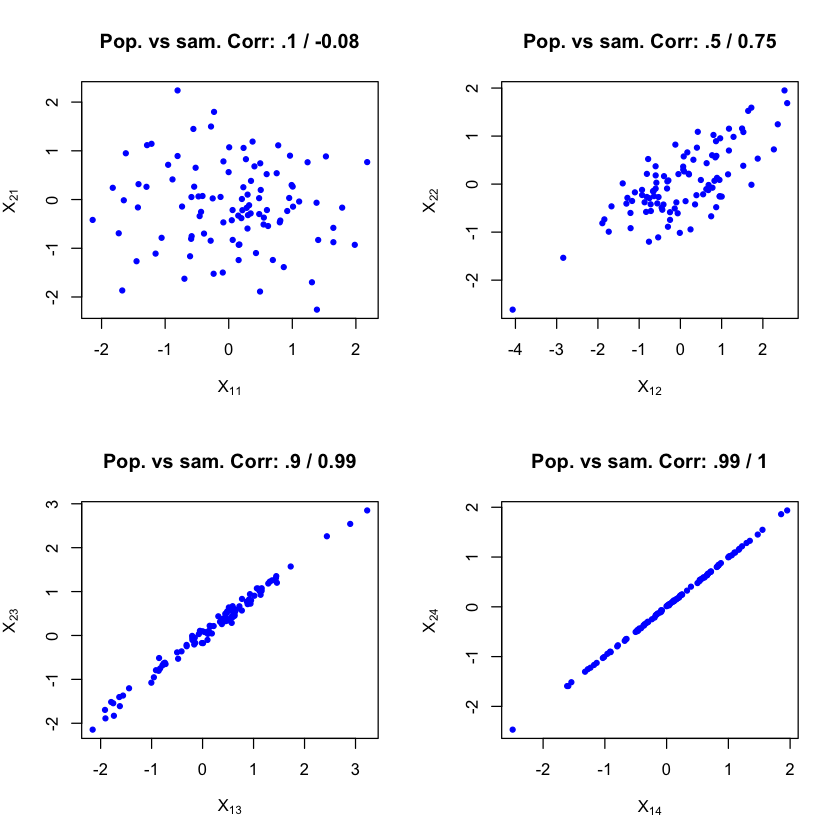

In [298]:
par(mfrow=c(2, 2))

plot(x1[, 1], x2[, 1], pch=20, col='blue', xlab=expression('X'[11]), ylab=expression('X'[21]), main=paste('Pop. vs sam. Corr: .1 /', round(cor(x1[, 1], x2[, 1]), digits=2) ))
plot(x1[, 2], x2[, 2], pch=20, col='blue', xlab=expression('X'[12]), ylab=expression('X'[22]), main=paste('Pop. vs sam. Corr: .5 /', round(cor(x1[, 2], x2[, 2]), digits=2) ))
plot(x1[, 3], x2[, 3], pch=20, col='blue', xlab=expression('X'[13]), ylab=expression('X'[23]), main=paste('Pop. vs sam. Corr: .9 /', round(cor(x1[, 3], x2[, 3]), digits=2) ))
plot(x1[, 4], x2[, 4], pch=20, col='blue', xlab=expression('X'[14]), ylab=expression('X'[24]), main=paste('Pop. vs sam. Corr: .99 /', round(cor(x1[, 4], x2[, 4]), digits=2) ))

## Regression

In [234]:
len = length(rhos)
for (i in 1:len) {
    model <- lm(y[, i] ~ x1[, i] + x2[, i])
    cat(sprintf('Model No.%s:\n****************\n', i))
    print(summary(model))
}

Model No.1:
****************

Call:
lm(formula = y[, i] ~ x1[, i] + x2[, i])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99709 -0.52769 -0.06274  0.28919  1.74855 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.0776     1.7400  -0.619    0.544    
x1[, i]       1.9816     0.1628  12.176 8.05e-10 ***
x2[, i]       3.7382     0.7324   5.104 8.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8487 on 17 degrees of freedom
Multiple R-squared:  0.9473,	Adjusted R-squared:  0.9411 
F-statistic: 152.7 on 2 and 17 DF,  p-value: 1.369e-11

Model No.2:
****************

Call:
lm(formula = y[, i] ~ x1[, i] + x2[, i])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8546 -0.3889 -0.1048  0.5576  2.0164 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.5991     2.3888  -0.251   0.8050  
x1[, i]       1.5990     0.9691   1.650   0.1173  
x2[, i]       

## Concluding Remarks
The strong multicolinearity [increases the stadard deviation of the regresion coefficient](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6900425/). Also note that there's a lot of a heck to unpack from the results reported by the $lm(.)$ function above.